# Forest Cover Classification

# Scope

In this project, you will use deep learning to predict forest cover type (the most common kind of tree cover) based only on cartographic variables. The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. The covertypes are the following:

- Spruce/Fir
- Lodgepole Pine
- Ponderosa Pine
- Cottonwood/Willow
- Aspen
- Douglas-fir
- Krummholz

Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is raw and has not been scaled or preprocessed for you. It contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so existing forest cover types are mainly a result of ecological processes rather than forest management practices.

# Project Objectives:

- Develop one or more classifiers for this multi-class classification problem.
- Use TensorFlow with Keras to build your classifier(s).
- Use your knowledge of hyperparameter tuning to improve the performance of your model(s).
- Test and analyze performance.
- Create clean and modular code.

# 1. Import modules

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 2. Preprocess and explore the dataset

In [2]:
# Read data into a pandas dataframe
df = pd.read_csv("cover_data.csv")

# Print out the first five rows of df
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
# print out information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [4]:
# Examine the shape of the dataframe (df)
df.shape

(581012, 55)

In [5]:
# Print out a summary statistics for df
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


#### The results from the last few outputs shows that,
- the data has 581012 rows (observations)
- each row contains 55 columns
- 54 of the columns are the descriptive attributes (features)
- the last column is the class (labels, i.e what we are attempting to predict)
- the data contains no missing values

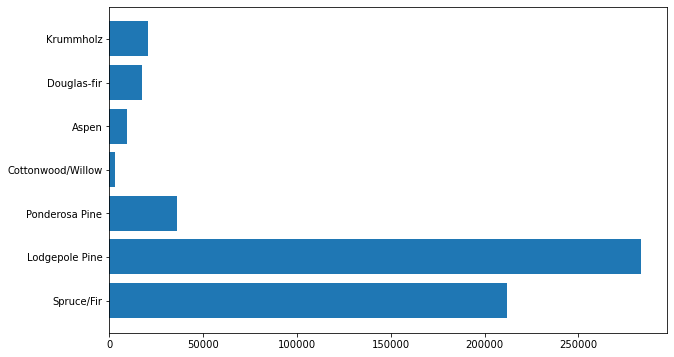

In [6]:
# A list of the forest cover types
forest_cover_types = ["Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"]

# Select the class column from df
df_class = df["class"].value_counts().reset_index()

# Create a figure of width 10 and height 6
plt.figure(figsize=(10, 6))
# Create a bar graph
plt.barh(df_class["index"], df_class["class"])
# Set yticks
plt.yticks(range(1, 8), forest_cover_types)
# Show plot
plt.show()

### Graph Literacy
- the data (class labels) set is very skewed, model accuracy may not accurately reflect genuine model performance so other matrics like F1, recall, etc should be considered

In [7]:
# Create features data
features = df.iloc[:, 0:-1]

# Create labels data
labels = df.iloc[:, -1]

In [8]:
# Inspect features data
features.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Inspect labels data
labels.head()

0    5
1    5
2    2
3    2
4    5
Name: class, dtype: int64

In [10]:
# Examine the value_counts for the true labels
df["class"].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: class, dtype: int64

### Split data into training set and test sets, and Normalize the data

In [11]:
# Split data into training set and test set
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, random_state=35, test_size=0.20)

# Create StandardScaler instance
scaler = StandardScaler()

# Fit and transform scaler to the training data
features_train_scaled = scaler.fit_transform(features_train)

# Transform test data instance
features_test_scaled = scaler.transform(features_test)

# 3. Build and train a model (Neural Network Model)

In [12]:
# Create a neural network model
def sequential_model(data):
    # Create a Sequential model
    model = Sequential()
    # Add the input layer to the model
    model.add(InputLayer(input_shape=(data.shape[1],)))
    # Add 512 hidden units with a rectified linear unit as activation function to the model
    model.add(Dense(512, activation="relu"))
    # Add 256 hidden units with a rectified linear unit as activation function to the model
    model.add(Dense(256, activation="relu"))
    # Add 128 hidden units with a rectified linear unit as activation function to the model
    model.add(Dense(128, activation="relu"))
    # Add 64 hidden units with a rectified linear unit as activation function to the model
    model.add(Dense(64, activation="relu"))
    # Add 32 hidden units with a rectified linear unit as activation function to the model
    model.add(Dense(32, activation="relu"))
    # Add 16 hidden units with a rectified linear unit as activation function to the model
    model.add(Dense(16, activation="relu"))
    # Add 8 hidden units with a rectified linear unit as activation function to the model
    model.add(Dense(8, activation="relu"))
    # Add 4 hidden units with a rectified linear unit as activation function to the model
    model.add(Dense(4, activation="relu"))
    # Set and add output layer to the model
    model.add(Dense(8, activation="softmax"))
    # Set an optimizer and compile the model
    model.compile(
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
        optimizer=Adam(learning_rate=0.001)
    )
    return model

# Call sequential_model on features_train_scaled
my_model = sequential_model(features_train_scaled)

# Set EarlyStopping for training efficiency
es = EarlyStopping(
    monitor="val_accuracy",
    mode="min",
    verbose=1,
    patience=25
)

# Print out summary about the model
print("Model's Summary\n=================================================================\n")
my_model.summary()

# Train the model
print("Training\n=================================================================\n")
history = my_model.fit(
    features_train_scaled,
    labels_train,
    epochs=500,
    batch_size=1000,
    verbose=1,
    validation_split=0.2,
    callbacks=[es]
)

Model's Summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               28160     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8) 

# 4. Performance Measurements

In [13]:
# Evaluate the model
loss, acc = my_model.evaluate(features_test_scaled, labels_test, verbose=0)

# Print out the final loss and the accuracy metrics
print("\nFinal loss: {}\nAccuracy metrics: {}".format(loss, acc))


Final loss: 0.18723611533641815
Accuracy metrics: 0.9274975657463074


In [14]:
# Make predictions
y_predict = my_model.predict(features_test_scaled)

# Convert the y_prediction to discrete values
y_predict = np.argmax(y_predict, axis=1)

# Examine the performance evaluation metric
print(classification_report(labels_test, y_predict, target_names=forest_cover_types))

                   precision    recall  f1-score   support

       Spruce/Fir       0.94      0.90      0.92     41875
   Lodgepole Pine       0.92      0.96      0.94     57060
   Ponderosa Pine       0.93      0.94      0.94      7150
Cottonwood/Willow       0.89      0.83      0.85       556
            Aspen       0.83      0.80      0.81      1944
      Douglas-fir       0.88      0.87      0.88      3410
        Krummholz       0.96      0.88      0.92      4208

         accuracy                           0.93    116203
        macro avg       0.91      0.88      0.89    116203
     weighted avg       0.93      0.93      0.93    116203



In [15]:
# Summary of prediction results on the classification
cm = confusion_matrix(labels_test, y_predict)
cm

array([[37536,  4165,     0,     0,    17,     9,   148],
       [ 1741, 54803,   108,     0,   278,   127,     3],
       [    1,   122,  6737,    41,    28,   221,     0],
       [    0,     1,    71,   459,     0,    25,     0],
       [    8,   347,    27,     0,  1553,     9,     0],
       [    1,   126,   294,    18,     1,  2970,     0],
       [  458,    30,     0,     0,     0,     0,  3720]], dtype=int64)

# 5. Plotting Performance

<Figure size 432x288 with 0 Axes>

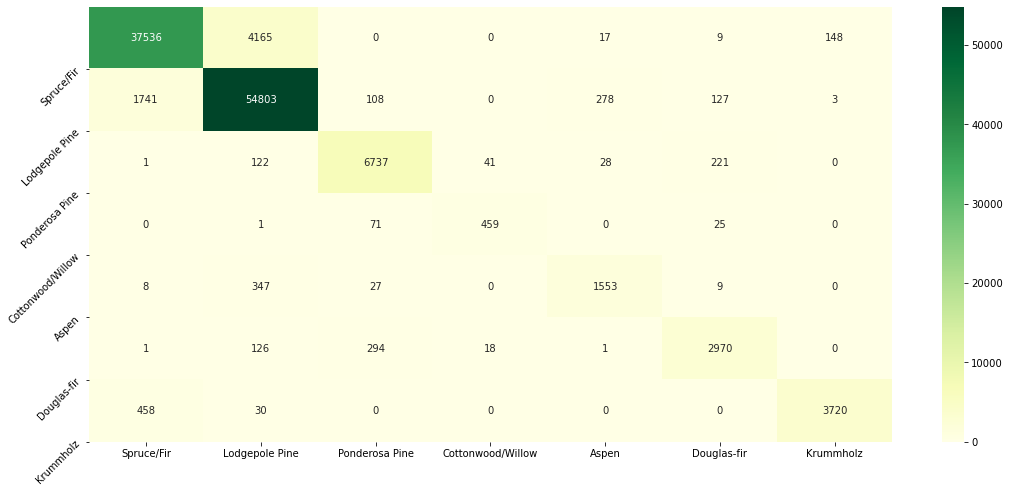

In [16]:
# Clear current plot
plt.clf()
# Create a figure of width 16 and height 6
plt.figure(figsize=(18, 8))
# Create a heatmap plot
sns.heatmap(cm, fmt='g', annot = True, cmap='YlGn', xticklabels = forest_cover_types)
# Set y-axis labels
plt.yticks(range(1,8), forest_cover_types, rotation=45, horizontalalignment='right')
# Show plot
plt.show()

<Figure size 432x288 with 0 Axes>

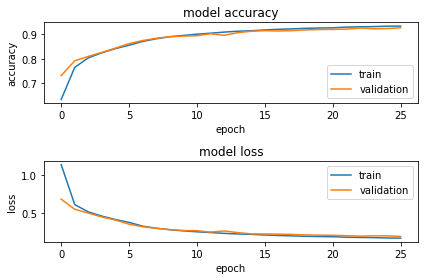

In [17]:
# Clear current plot
plt.clf()

# Create a figure
fig = plt.figure()

# Create first plot
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend(['train', 'validation'], loc='lower right')

# Create second plot
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
ax2.legend(['train', 'validation'], loc='upper right')
 
# Keep plots from overlapping
fig.tight_layout()

plt.show()

# 6. Conclusion

- This project gave an opportunity to build a deep learning model to predict a forest cover type.
- The model was built using TensorFlow with keras and was trained and validated.
- To arrive at a good accuracy for the model, certain hyperparameters was tweaked and an early stopping was implemented to avoid overfitting.
- An accuracy of about 92% was achieved.
- Despite the data being imbalanced, the model's performance (classification report, confusion matrix and the metrics) indicated that, the model correctly classifies the majority of the forest cover.